#                                Rainfall Weather Forecasting
#### Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
##### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\internship\data\dataset3-main\weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

In [4]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.drop_duplicates(inplace=True)  # dropping duplicates if any

In [7]:
df.shape     # checking shape again as we drop all the duplicates 

(6762, 23)

As we can see, removing the duplicate entries alters the form of the data. Only 6762 rows remained after eliminating the duplicate items from the original 8425 rows. The data was reduced by 1663 rows.

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [9]:
df.skew().sort_values()

Sunshine         -0.637137
Humidity9am      -0.255152
Cloud9am         -0.183033
Cloud3pm         -0.137486
MinTemp          -0.083271
Temp9am          -0.047034
Pressure9am       0.019836
Pressure3pm       0.038601
Humidity3pm       0.149786
MaxTemp           0.326215
Temp3pm           0.345725
WindSpeed3pm      0.545718
WindGustSpeed     0.724065
WindSpeed9am      0.952569
Evaporation      10.216570
Rainfall         13.510350
dtype: float64

In [10]:
# Checking number of unique values in each column
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
# Checkinh the values of yes and no in rainfall today and tomorrow
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

No     5052
Yes    1572
Name: RainToday, dtype: int64
No     5052
Yes    1572
Name: RainTomorrow, dtype: int64


### Analysing Numerical Column


In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [13]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 2
Continuous feature Count 14


In [14]:
print("Discrete Features are :",'\n',discrete_feature )
print('\n')
print("Continuous Features are :",'\n',continuous_feature )

Discrete Features are : 
 ['Cloud9am', 'Cloud3pm']


Continuous Features are : 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


### Fill NaN values of columns

#### (a) filling the null value for numerical variables

In [15]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

#### (b) Filling the missing values for categorical variables with mode

In [16]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Now that we've filled in the mean and mode values for every column, we'll verify the data once again to see if any null values remain. If not, we'll move on to the next step.

In [17]:
# Now we will check wheather there is null value present or not
df.isnull().sum()  # As there is no null values present in data we will move forward

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We will change the yes or no values of "Raintoday" and "Raintomorrow" to 0 or 1.

In [18]:
# Create a dictionary mapping the original values to the corresponding integer values
mapping = {'Yes': 0, 'No': 1}

# Defining the columns want to replace the values for
columns_to_replace = ['RainToday','RainTomorrow']

# replace the values using the mapping dictionary
for column in columns_to_replace:
    df[column] = df[column].map(mapping)

# the updated DataFrame
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     13.4       0.6     5.302395  7.890896   
1     2008-12-02   Albury      7.4      7.4       0.0     5.302395  7.890896   
2     2008-12-03   Albury     12.9     12.9       0.0     5.302395  7.890896   
3     2008-12-04   Albury      9.2      9.2       0.0     5.302395  7.890896   
4     2008-12-05   Albury     17.5     17.5       1.0     5.302395  7.890896   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8      2.8       0.0     5.302395  7.890896   
8421  2017-06-22    Uluru      3.6      3.6       0.0     5.302395  7.890896   
8422  2017-06-23    Uluru      5.4      5.4       0.0     5.302395  7.890896   
8423  2017-06-24    Uluru      7.8      7.8       0.0     5.302395  7.890896   
8424  2017-06-25    Uluru     14.9     14.9       0.0     5.302395  7.890896   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W      44.000000          W  ...        71.0         22.0   
1            WNW      44.000000        NNW  ...        44.0         25.0   
2            WSW      46.000000          W  ...        38.0         30.0   
3             NE      24.000000         SE  ...        45.0         16.0   
4              W      41.000000        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E      31.000000         SE  ...        51.0         24.0   
8421         NNW      22.000000         SE  ...        56.0         21.0   
8422           N      37.000000         SE  ...        53.0         24.0   
8423          SE      28.000000        SSE  ...        51.0         24.0   
8424           E      38.977663        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.320988     16.9     21.8   
1          1010.6       1007.8  4.336806  4.320988     17.2     24.3   
2          1007.6       1008.7  4.336806  2.000000     21.0     23.2   
3          1017.6       1012.8  4.336806  4.320988     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.336806  4.320988     10.1     22.4   
8421       1023.5       1019.1  4.336806  4.320988     10.9     24.5   
8422       1021.0       1016.8  4.336806  4.320988     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0             1             1  
1             1             1  
2             1             1  
3             1             1  
4             1             1  
...         ...           ...  
8420          1             1  
8421          1             1  
8422          1             1  
8423          1             1  
8424          1             1  

[6762 rows x 23 columns]

In [19]:
df.isnull().sum().sum()   # after modifying values checking is there any null values or not

0

In [20]:
df.describe().T

count         mean        std    min          25%  \
MinTemp        6762.0    13.109145   5.540667   -2.0     9.000000   
MaxTemp        6762.0    13.109145   5.540667   -2.0     9.000000   
Rainfall       6762.0     2.780148  10.482769    0.0     0.000000   
Evaporation    6762.0     5.302395   3.343713    0.0     4.000000   
Sunshine       6762.0     7.890896   2.733639    0.0     7.890896   
WindGustSpeed  6762.0    38.977663  13.376457    7.0    30.000000   
WindSpeed9am   6762.0    12.782206   9.787577    0.0     6.000000   
WindSpeed3pm   6762.0    17.571150   9.548634    0.0    11.000000   
Humidity9am    6762.0    67.506559  17.182700   10.0    56.000000   
Humidity3pm    6762.0    50.467147  18.498341    6.0    38.000000   
Pressure9am    6762.0  1017.626311   6.027914  989.8  1014.200000   
Pressure3pm    6762.0  1015.119923   5.967638  982.9  1011.500000   
Cloud9am       6762.0     4.336806   2.474649    0.0     2.000000   
Cloud3pm       6762.0     4.320988   2.323276    0.0     3.000000   
Temp9am        6762.0    17.895038   5.722411    1.9    13.900000   
Temp3pm        6762.0    22.708561   5.971845    7.3    18.400000   
RainToday      6762.0     0.767524   0.422442    0.0     1.000000   
RainTomorrow   6762.0     0.767524   0.422442    0.0     1.000000   

                       50%          75%     max  
MinTemp          13.109145    17.400000    28.5  
MaxTemp          13.109145    17.400000    28.5  
Rainfall          0.000000     1.200000   371.0  
Evaporation       5.302395     5.302395   145.0  
Sunshine          7.890896     9.200000    13.9  
WindGustSpeed    38.977663    46.000000   107.0  
WindSpeed9am     11.000000    19.000000    63.0  
WindSpeed3pm     17.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      50.000000    62.000000    99.0  
Pressure9am    1017.626311  1020.900000  1039.0  
Pressure3pm    1015.119923  1018.400000  1036.0  
Cloud9am          4.336806     7.000000     8.0  
Cloud3pm          4.320988     6.000000     8.0  
Temp9am          17.900000    22.200000    39.4  
Temp3pm          22.300000    26.800000    44.1  
RainToday         1.000000     1.000000     1.0  
RainTomorrow      1.000000     1.000000     1.0

In [21]:
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  1.000000  0.092371     0.269812  0.039286   
MaxTemp        1.000000  1.000000  0.092371     0.269812  0.039286   
Rainfall       0.092371  0.092371  1.000000    -0.000755 -0.191656   
Evaporation    0.269812  0.269812 -0.000755     1.000000  0.266157   
Sunshine       0.039286  0.039286 -0.191656     0.266157  1.000000   
WindGustSpeed  0.242738  0.242738  0.089987     0.163857  0.007625   
WindSpeed9am   0.169397  0.169397  0.051829     0.132703  0.008813   
WindSpeed3pm   0.188276  0.188276  0.022696     0.113176  0.049033   
Humidity9am   -0.154248 -0.154248  0.228654    -0.245437 -0.378872   
Humidity3pm    0.067683  0.067683  0.243394    -0.190148 -0.445111   
Pressure9am   -0.441253 -0.441253 -0.073004    -0.201959 -0.002095   
Pressure3pm   -0.440363 -0.440363 -0.034081    -0.216711 -0.058151   
Cloud9am       0.095403  0.095403  0.196189    -0.074490 -0.542442   
Cloud3pm       0.047495  0.047495  0.162653    -0.121875 -0.562537   
Temp9am        0.891425  0.891425 -0.004172     0.317396  0.236174   
Temp3pm        0.696419  0.696419 -0.091987     0.340045  0.374244   
RainToday     -0.075933 -0.075933 -0.459163     0.112552  0.256123   
RainTomorrow  -0.097146 -0.097146 -0.224213     0.076733  0.345509   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.242738      0.169397      0.188276    -0.154248   
MaxTemp             0.242738      0.169397      0.188276    -0.154248   
Rainfall            0.089987      0.051829      0.022696     0.228654   
Evaporation         0.163857      0.132703      0.113176    -0.245437   
Sunshine            0.007625      0.008813      0.049033    -0.378872   
WindGustSpeed       1.000000      0.591784      0.620606    -0.268973   
WindSpeed9am        0.591784      1.000000      0.551348    -0.373061   
WindSpeed3pm        0.620606      0.551348      1.000000    -0.259812   
Humidity9am        -0.268973     -0.373061     -0.259812     1.000000   
Humidity3pm        -0.095502     -0.121519     -0.100704     0.639470   
Pressure9am        -0.394164     -0.177664     -0.248316     0.137254   
Pressure3pm        -0.363104     -0.147296     -0.208384     0.173859   
Cloud9am            0.013532     -0.024997     -0.013567     0.420958   
Cloud3pm            0.058182      0.022110     -0.021128     0.320440   
Temp9am             0.221725      0.152106      0.207860    -0.407533   
Temp3pm             0.129756      0.041762      0.092975    -0.418024   
RainToday          -0.085806     -0.033367     -0.011844    -0.387261   
RainTomorrow       -0.184435     -0.057939     -0.043409    -0.287774   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.067683    -0.441253    -0.440363  0.095403  0.047495   
MaxTemp           0.067683    -0.441253    -0.440363  0.095403  0.047495   
Rainfall          0.243394    -0.073004    -0.034081  0.196189  0.162653   
Evaporation      -0.190148    -0.201959    -0.216711 -0.074490 -0.121875   
Sunshine         -0.445111    -0.002095    -0.058151 -0.542442 -0.562537   
WindGustSpeed    -0.095502    -0.394164    -0.363104  0.013532  0.058182   
WindSpeed9am     -0.121519    -0.177664    -0.147296 -0.024997  0.022110   
WindSpeed3pm     -0.100704    -0.248316    -0.208384 -0.013567 -0.021128   
Humidity9am       0.639470     0.137254     0.173859  0.420958  0.320440   
Humidity3pm       1.000000    -0.006328     0.061228  0.431851  0.458972   
Pressure9am      -0.006328     1.000000     0.963072 -0.071974 -0.078435   
Pressure3pm       0.061228     0.963072     1.000000 -0.016433 -0.025798   
Cloud9am          0.431851    -0.071974    -0.016433  1.000000  0.594918   
Cloud3pm          0.458972    -0.078435    -0.025798  0.594918  1.000000   
Temp9am          -0.136803    -0.421406    -0.451247 -0.131291 -0.117690   
Temp3pm          -0.500404    -0.297724    -0.381029 -0.260977 -0.285080   
RainT

In [22]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [23]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Adelaide      10.980000  10.980000  1.434735     5.095359  7.890896   
Albury        10.062123  10.062123  2.128800     5.302395  7.890896   
Brisbane      15.368928  15.368928  3.109673     4.875479  7.926644   
CoffsHarbour  13.704107  13.704107  5.434665     3.698749  7.332570   
Darwin        21.324800  21.324800  2.735200     6.349210  9.389200   
Melbourne     12.443280  12.443280  2.311971     4.529963  6.419718   
Newcastle     12.931789  12.931789  3.028616     5.302395  7.890896   
Penrith       11.279668  11.279668  2.361287     5.302395  7.890896   
PerthAirport  13.172674  13.172674  1.916279     5.784387  8.797976   
Uluru          5.997436   5.997436  0.010256     5.302395  7.890896   
Williamtown   14.245706  14.245706  3.590481     7.016013  7.967099   
Wollongong    15.403530  15.403530  3.169285     5.302395  7.890896   

              WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location                                                               
Adelaide          37.990244     11.317073     16.404878    59.029268   
Albury            33.918117      8.245145     14.294061    72.604190   
Brisbane          26.441872      6.031088      9.682456    66.474105   
CoffsHarbour      38.815634     15.385539     20.509235    66.314239   
Darwin            39.288000     16.012000     20.204000    63.828000   
Melbourne         45.769228     19.709001     22.697904    66.754015   
Newcastle         38.977663      5.636495     12.646130    73.736393   
Penrith           31.410742      5.626556     11.024896    72.863071   
PerthAirport      44.776188     18.043189     21.353821    58.833887   
Uluru             34.871222     13.282051     16.769231    53.564103   
Williamtown       41.770941     16.569170     22.176073    72.040650   
Wollongong        46.029253     16.785354     21.859550    69.468465   

              Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Location                                                                  
Adelaide        44.809756  1020.091220  1018.074634  4.336806  4.320988   
Albury          47.062845  1017.581477  1014.981477  5.147625  4.728749   
Brisbane        54.179507  1018.123661  1015.031330  3.694301  3.898655   
CoffsHarbour    60.647246  1018.587647  1016.097021  3.816694  4.115617   
Darwin          43.932000  1013.373200  1009.524800  3.800000  3.580000   
Melbourne       51.244062  1017.845623  1016.075117  5.102724  5.082858   
Newcastle       55.832898  1017.626311  1015.119923  4.051695  4.330029   
Penrith         45.481328  1017.626311  1015.119923  4.336806  4.320988   
PerthAirport    42.131229  1017.082497  1014.548173  3.449336  3.559801   
Uluru           25.512821  1024.779487  1021.148718  4.635328  4.494144   
Williamtown     54.329215  1017.783089  1015.252683  5.226259  4.839787   
Wollongong      65.271736  1016.887031  1014.992827  5.229826  4.957129   

                Temp9am    Temp3pm  RainToday  RainTomorrow  
Location                                                     
Adelaide      15.861951  20.189756   0.785366      0.780488  
Albury        14.555347  21.673539   0.780595      0.780595  
Brisbane      20.685656  23.977059   0.766839      0.766839  
CoffsHarbour  19.611620  21.746168   0.693944      0.695581  
Darwin        25.601200  30.668000   0.868000      0.872000  
Melbourne     15.333163  19.952785   0.750925      0.749692  
Newcastle     17.440604  22.352102   0.759124      0.759124  
Penrith       15.533195  22.135270   0.759336      0.759336  
PerthAirport  19.330648  24.472176   0.799003      0.799003  
Uluru         11.523077  22.123077   1.000000      1.000000  
Williamtown   19.261951  23.663252   0.751220      0.751220  
Wollongong    18.417216  20.326269   0.734177      0.734177

### Performing EDA (Data Visualization)

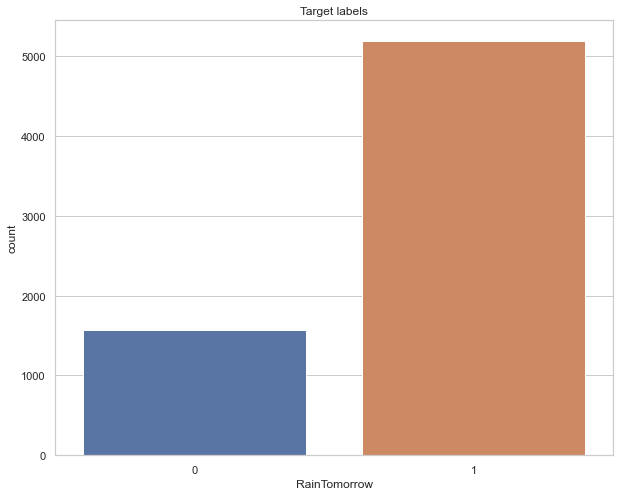

In [24]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

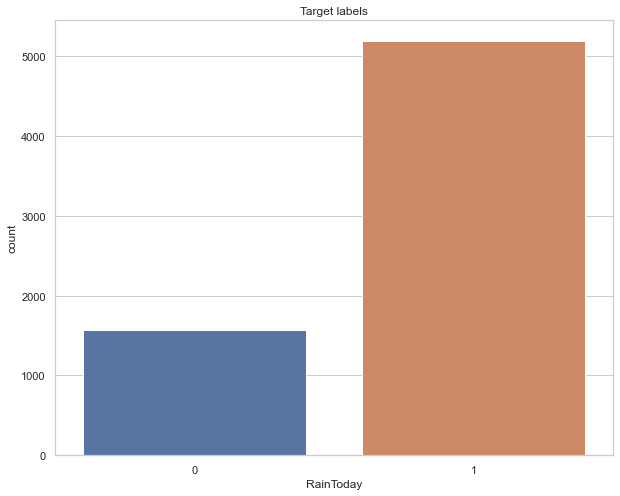


 From above plot it is clear that data set is imbalanced. We will do SMOTE analysis later


In [25]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.countplot(df.RainToday)
plt.title("Target labels")
plt.show()
print('\n From above plot it is clear that data set is imbalanced. We will do SMOTE analysis later')

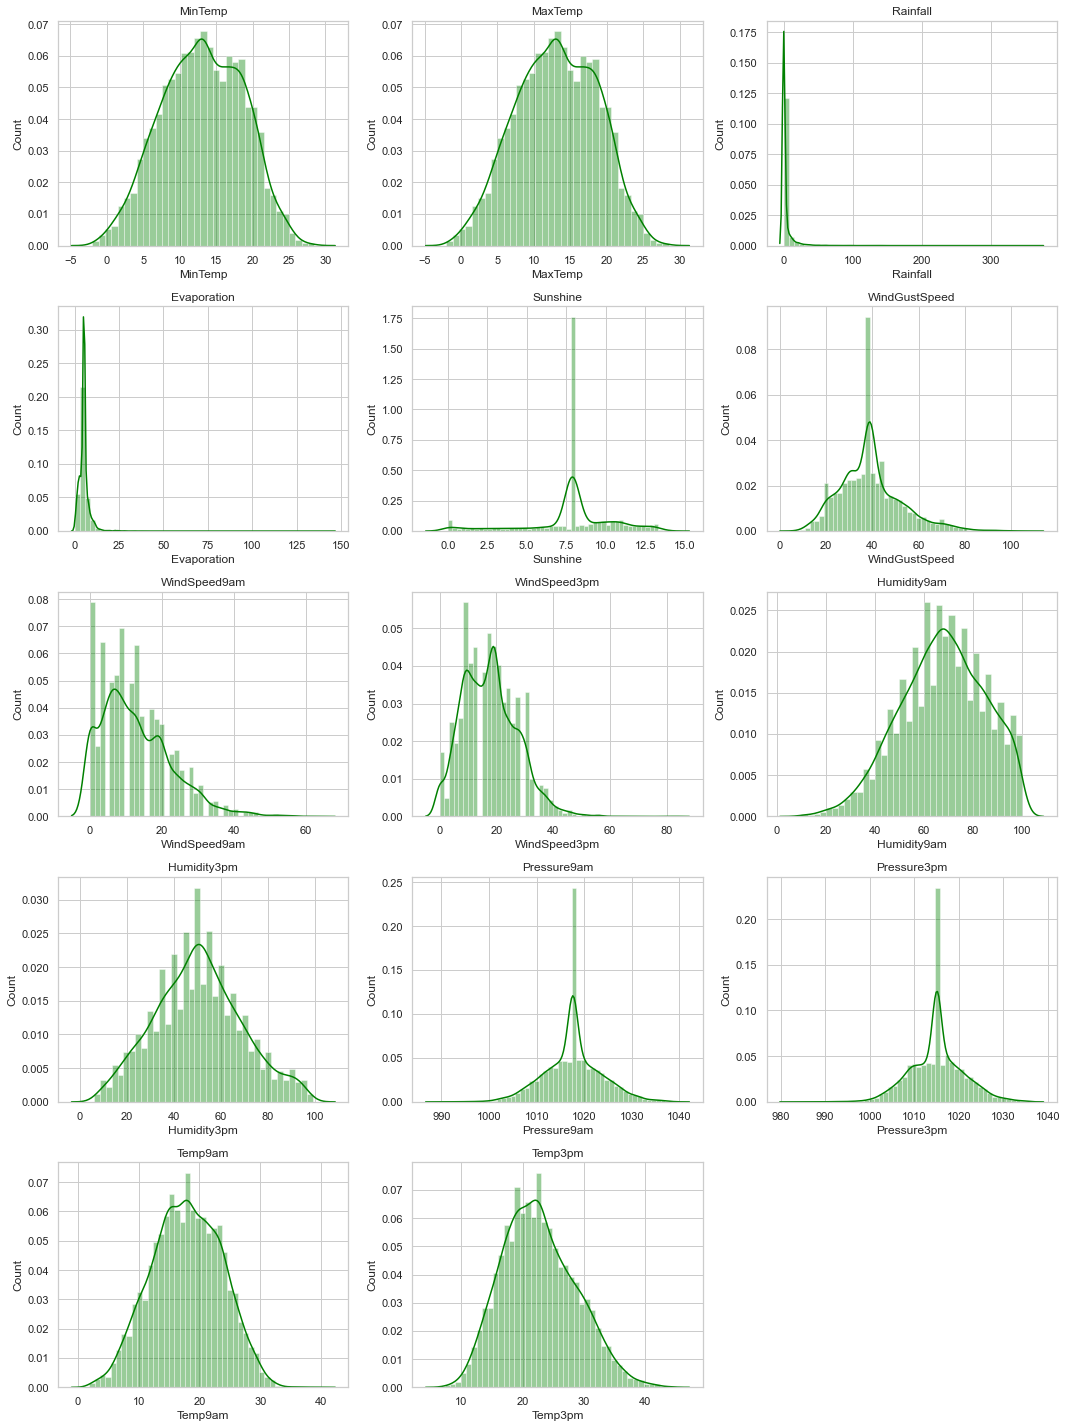

In [26]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(continuous_feature):
    data=df.copy()
    plt.subplot(5,3,i+1)
    sns.distplot(df[feature],color='green')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
plt.tight_layout()    
plt.show()

The majority of the columns, including mintemp, maxtemp, sunshine, wind gust speed, humidity at 9 a.m. and 3 p.m., pressure at 9 a.m. and 3 p.m., temperature at 9 a.m. and temperature at 3 p.m., are visible from the distribution map.

Thus, the data are not greatly biassed. It is okay to go forward.

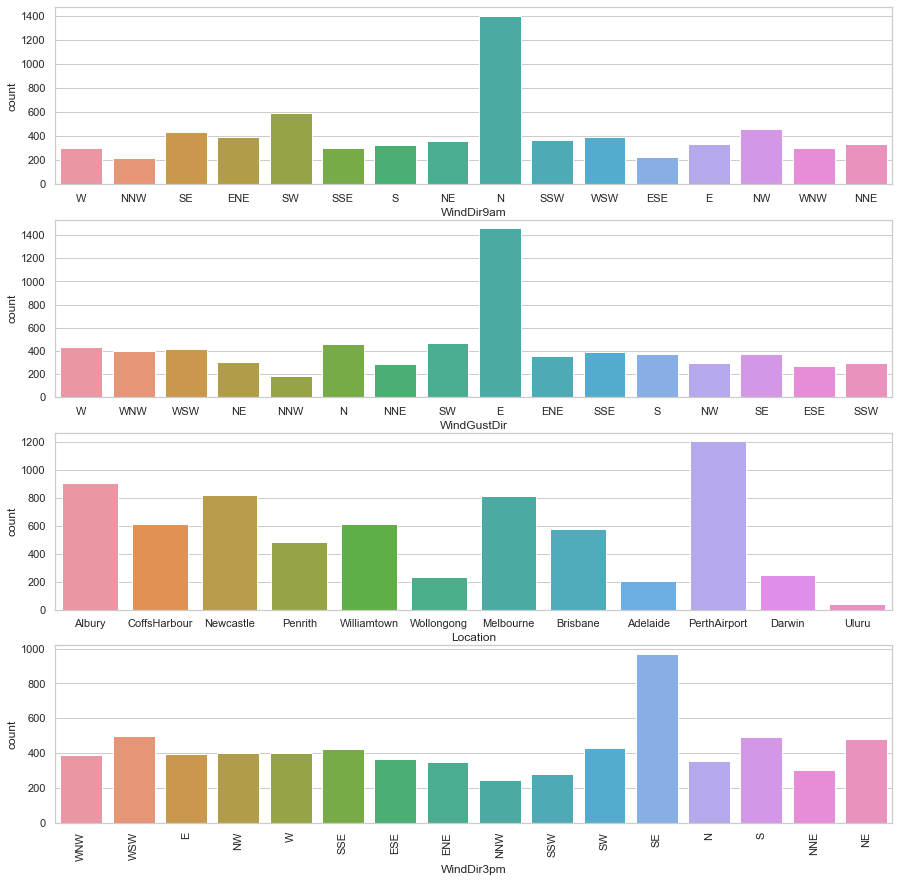

In [27]:
categoricalPlot = ['WindDir9am','WindGustDir','Location', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

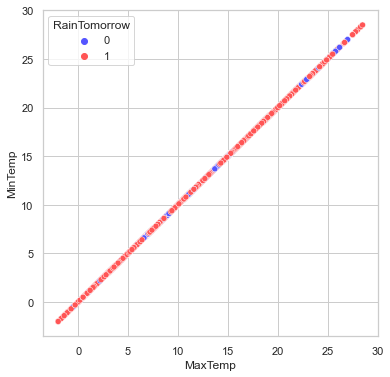

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='MaxTemp' , y='MinTemp', hue='RainTomorrow', palette='seismic', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

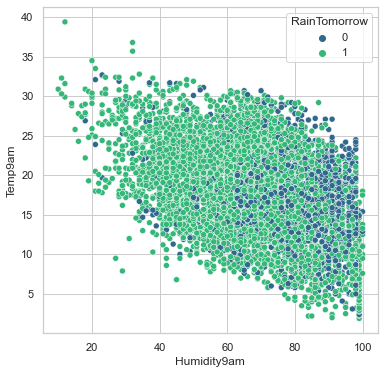

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Humidity9am' , y='Temp9am', hue='RainTomorrow', palette='viridis', data=df)

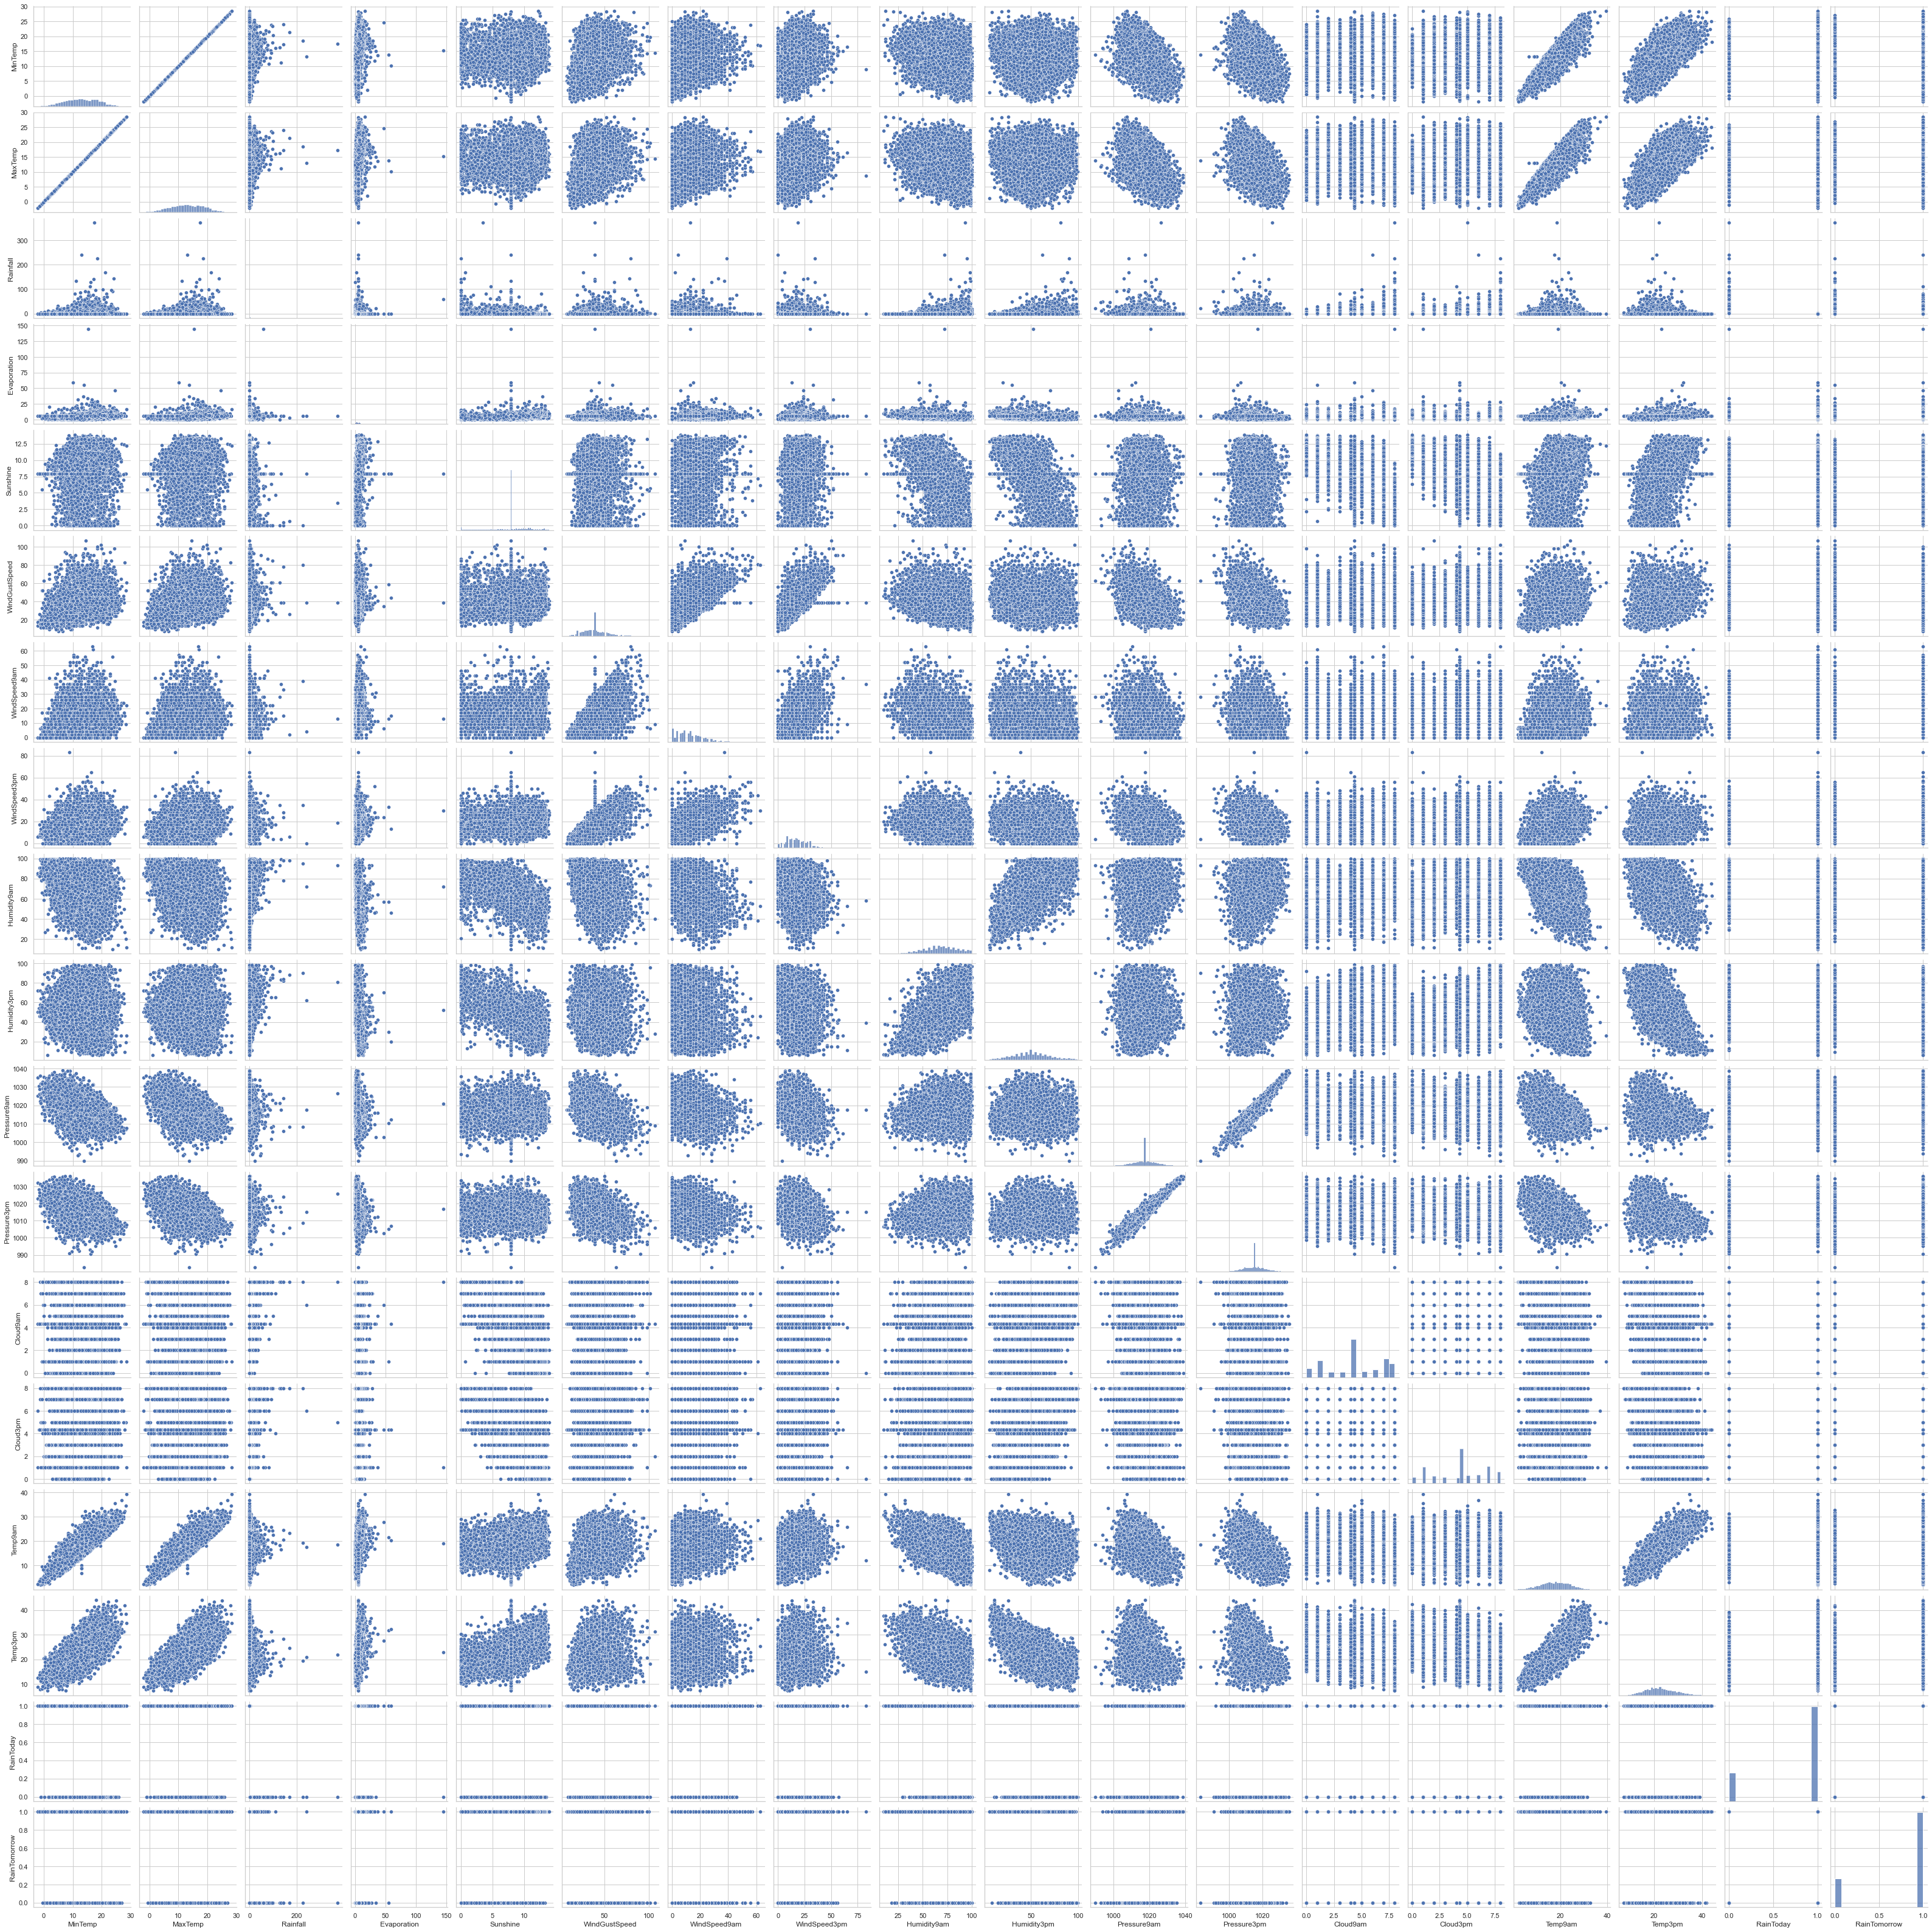

In [30]:
# Now we will plort pair plot 
sns.pairplot(df)
plt.show()

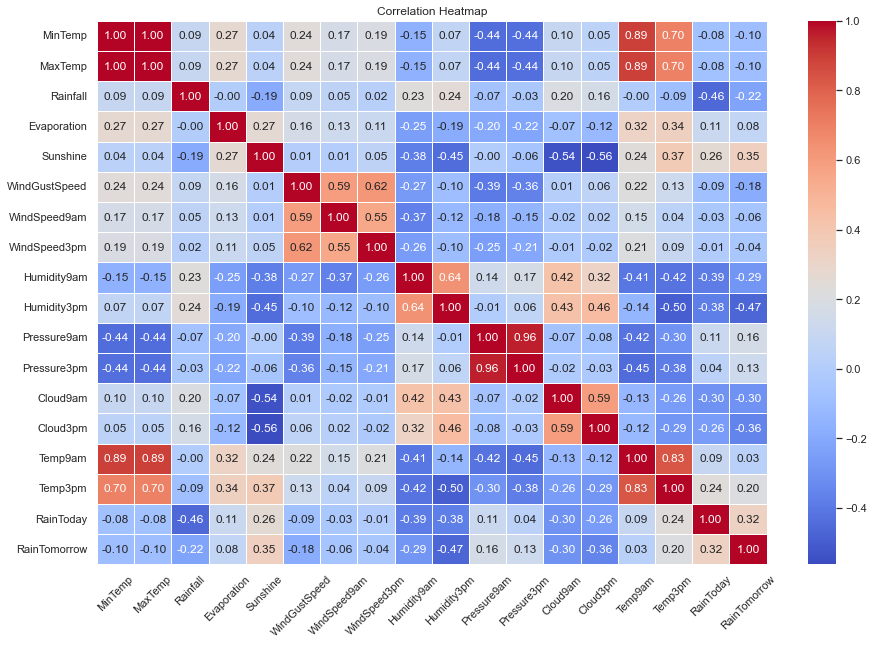

In [31]:
plt.figure(figsize=(15, 10)) 

# Plotting the heatmap 
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="white", fmt=".2f", cmap="coolwarm")

# Customizing the plot
plt.title("Correlation Heatmap")  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [32]:
# dropping columns which have less use with data
df=df.drop(columns=['Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)

In [33]:
#checking data after dropping columns
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


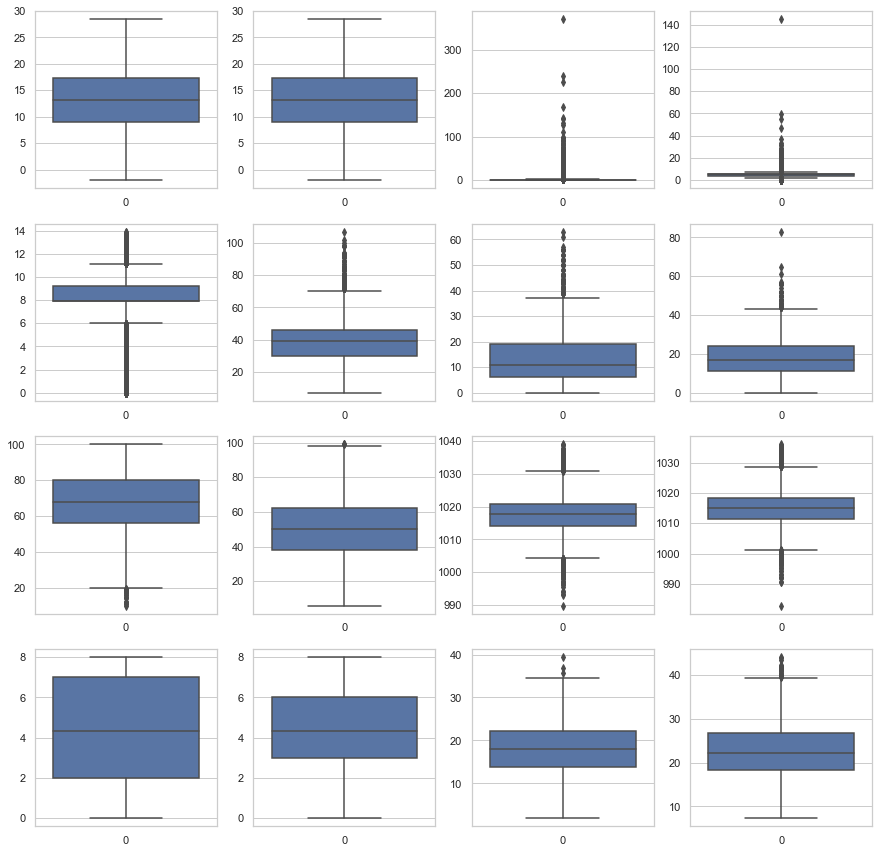

In [34]:
# Checking outliers in Numerical columns

n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

In [35]:
# Removing Outliers from Numerical Columns
def removeOutliers(numerical_feature):
    global df
    for i in range(len(numerical_feature)):
        q1 = df[numerical_feature[i]].quantile(0.25)
        q3 = df[numerical_feature[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical_feature[i]] <= minimum), numerical_feature[i]] = minimum
        df.loc[(df[numerical_feature[i]] >= maximum), numerical_feature[i]] = maximum  

In [36]:
removeOutliers(numerical_feature)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


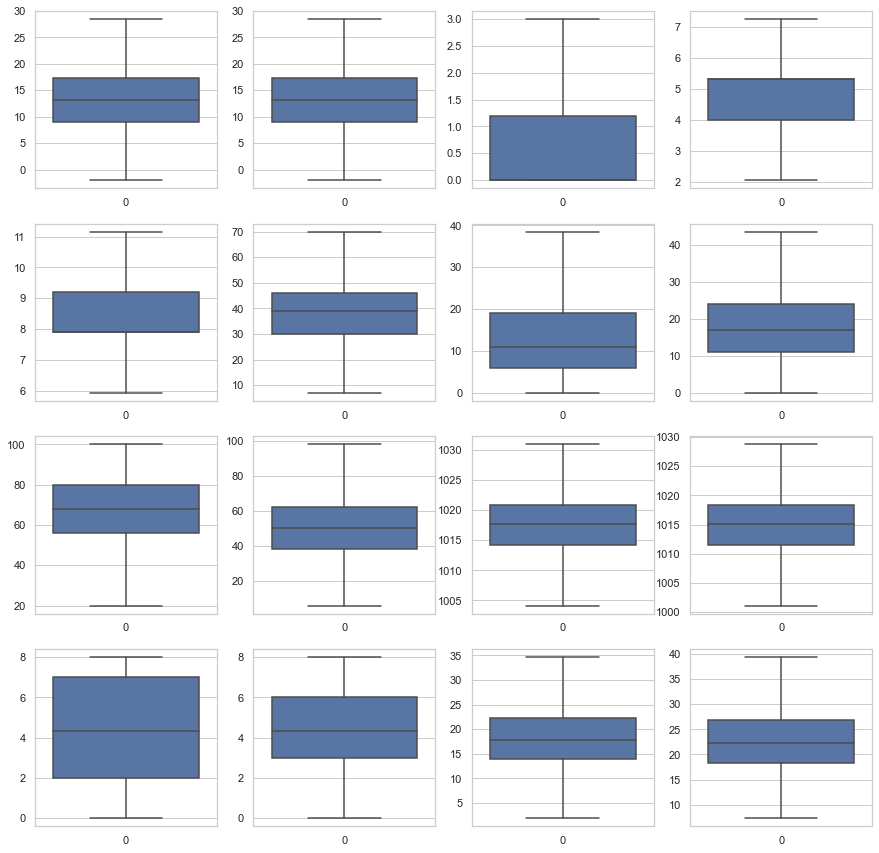

In [37]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

## (a) Splitting the data into x and y to forecast whether or not it will rain tomorrow. The target column is "RainTomorrow".

In [38]:
# Applying SMOTE to correct imbalance in target

X=df.drop('RainTomorrow', axis=1)
y=df["RainTomorrow"]
y

0       1
1       1
2       1
3       1
4       1
       ..
8420    1
8421    1
8422    1
8423    1
8424    1
Name: RainTomorrow, Length: 6762, dtype: int64

In [39]:
#Balancing data by applying SMOTE.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(X,y)
print(sm_x.shape)
print(sm_y.shape)

(10380, 17)
(10380,)


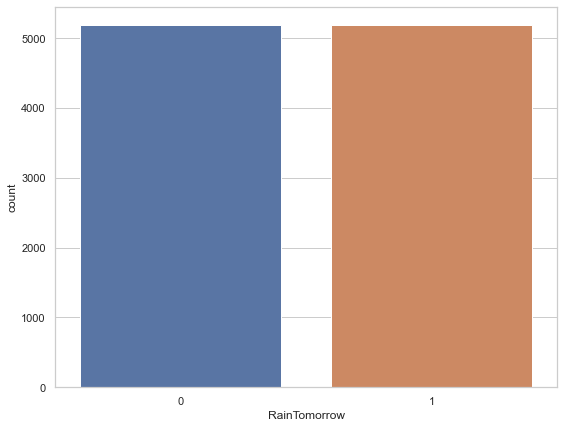

1    5190
0    5190
Name: RainTomorrow, dtype: int64


In [40]:
plt.figure(figsize=(9,7))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

In [41]:
# Applying PCA to reduce multicollinearity
from sklearn.decomposition import PCA

# Creating instance of class to identify number of components for cumulative variance of 95%
pca = PCA(0.90)

X_pca=pca.fit_transform(sm_x)
X_pca.shape

(10380, 5)

In [42]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_pca.transpose())
corrmat.shape

(5, 5)

<AxesSubplot:>

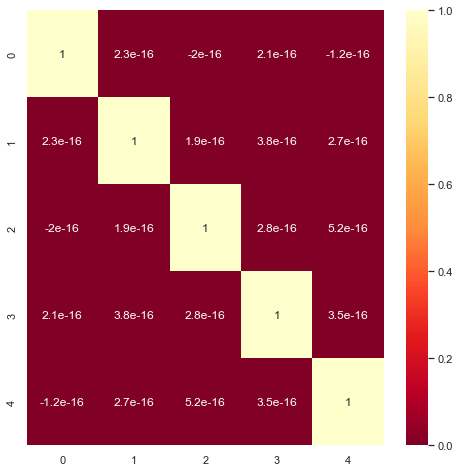

In [43]:
# Plotting heatmap to oserve the correlation between features
plt.figure(figsize=[8,8])
sns.heatmap(corrmat,cmap='YlOrRd_r', annot=True)

As we drop less correlated columns from the data, we use the left columns for model building.

In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_pca=scale.fit_transform(X_pca)
X_pca

array([[ 1.12766523, -0.14765914,  1.35982112,  1.51949576, -0.00533417],
       [ 1.63986381, -0.49023104,  0.20615569, -0.02727193,  1.90255639],
       [ 1.77394802,  0.28289209, -0.41068865, -0.47462499,  0.80110182],
       ...,
       [-0.71502902,  0.72597995,  1.20836383, -0.1564768 , -2.15347158],
       [-1.22211205,  0.27607756, -0.27018158,  0.11391754, -0.41791351],
       [-0.73131258, -0.33265612, -0.72528929,  1.21901519,  0.34294963]])

### Performing ML

In [45]:
# importing libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score,auc,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,average_precision_score



from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [46]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [47]:
# Define dataset
X, y = make_classification(n_samples=250, weights=[0.193], flip_y=0)

# Summarize class distribution
print("Original class distribution:")
print(Counter(y))

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution
print("Oversampled class distribution:")
print(Counter(y_over))

Original class distribution:
Counter({1: 201, 0: 49})
Oversampled class distribution:
Counter({1: 201, 0: 201})


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, sm_y, test_size=0.25, random_state=30)

### LR model

In [49]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
train_accuracy=accuracy_score(y_test,predlr)*100
test_accuracy=accuracy_score(y_train,pred_train_lr)*100
print(train_accuracy)
print(test_accuracy)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

75.45279383429673
76.55748233782916
[[ 950  325]
 [ 312 1008]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1275
           1       0.76      0.76      0.76      1320

    accuracy                           0.75      2595
   macro avg       0.75      0.75      0.75      2595
weighted avg       0.75      0.75      0.75      2595



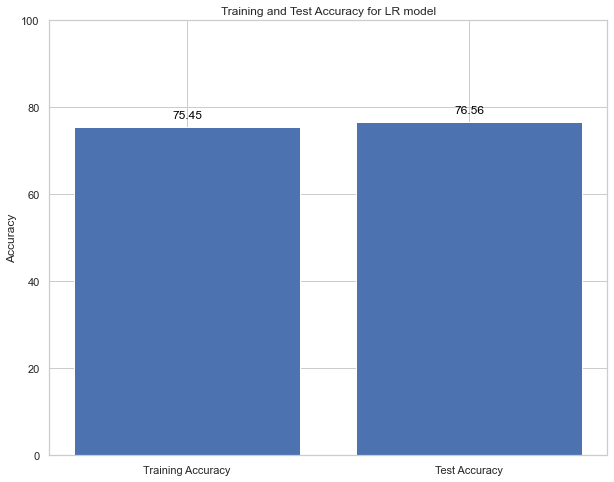

In [50]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for LR model')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### KNN Model

In [51]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
test_accuracy=accuracy_score(y_test,predKNN)*100
train_accuracy=accuracy_score(y_train,pred_train_KNN)*100
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

[[1125  150]
 [ 337  983]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1275
           1       0.87      0.74      0.80      1320

    accuracy                           0.81      2595
   macro avg       0.82      0.81      0.81      2595
weighted avg       0.82      0.81      0.81      2595



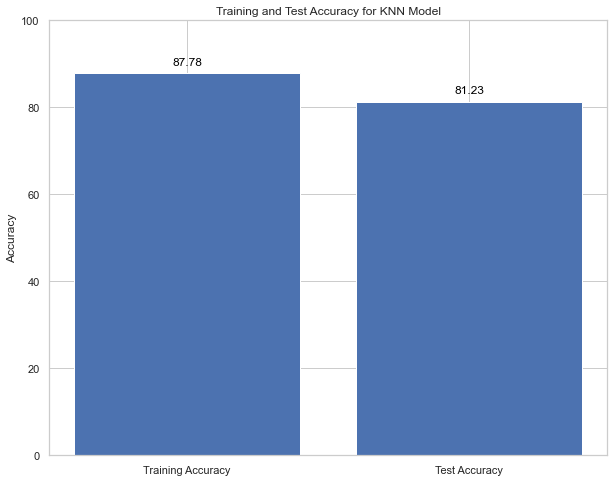

In [52]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for KNN Model')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Decision Tree Model

In [53]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
test_accuracy=accuracy_score(y_test,preddt)*100
train_accuracy=accuracy_score(y_train,pred_train_dt)*100
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

[[1049  226]
 [ 341  979]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1275
           1       0.81      0.74      0.78      1320

    accuracy                           0.78      2595
   macro avg       0.78      0.78      0.78      2595
weighted avg       0.78      0.78      0.78      2595



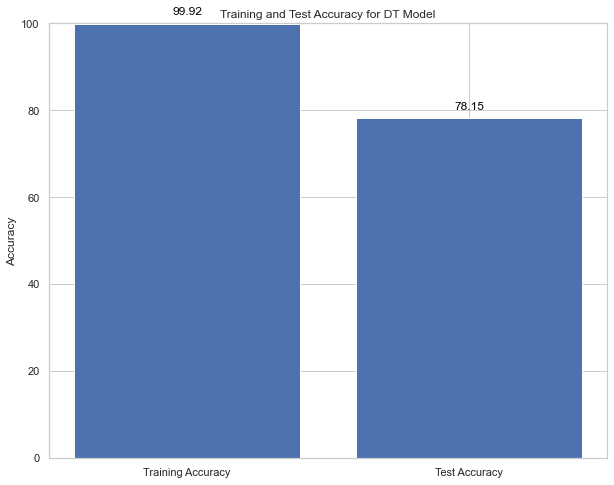

In [54]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for DT Model')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Random Forest Model

In [55]:
# for RDF model
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
test_accuracy=accuracy_score(y_test,predrdf)*100
train_accuracy=accuracy_score(y_train,pred_train_rdf)*100
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

[[1104  171]
 [ 250 1070]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1275
           1       0.86      0.81      0.84      1320

    accuracy                           0.84      2595
   macro avg       0.84      0.84      0.84      2595
weighted avg       0.84      0.84      0.84      2595



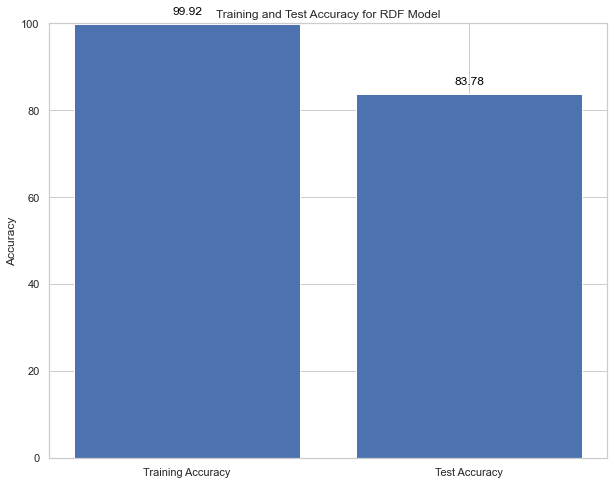

In [56]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for RDF Model')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### SVC Model

In [57]:
# For SVC model
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
test_accuracy=accuracy_score(y_test,pred_svc)*100
train_accuracy=accuracy_score(y_train,pred_train_svc)*100
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[ 969  306]
 [ 273 1047]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1275
           1       0.77      0.79      0.78      1320

    accuracy                           0.78      2595
   macro avg       0.78      0.78      0.78      2595
weighted avg       0.78      0.78      0.78      2595



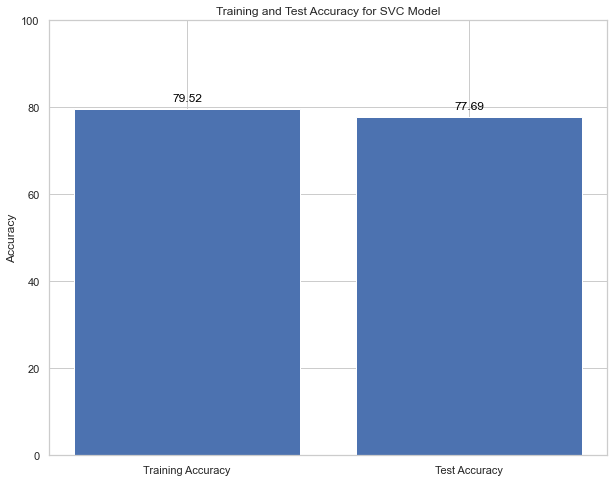

In [58]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for SVC Model')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Checking for cross validation score

In [59]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 85.60000000000001


In [60]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 80.39999999999999


In [61]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 88.79999999999998


In [62]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 88.4


In [63]:
cr_5=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 83.6


Since the RDF model has the highest cross-validate and test accuracy scores overall, we will use it for hyperparameter tuning.

## Hyperparameter tunning 

In [64]:
RandomForestClassifier()
parameters={'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [65]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

79.46050096339114

### roc_auc curve

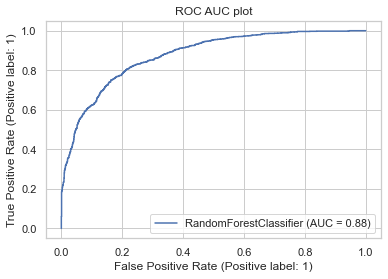

In [66]:
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show()

There is an 89% chance of rain tomorrow, according to the model curve.


## (b) Splitting the data into x and y to predict how much rainfall could be there. The target column is "Rainfall".

In [67]:
#splitting data into features and label
features=df.drop('Rainfall', axis=1)
label=df["Rainfall"]

In [68]:
#scaling the data
scalar=PowerTransformer()
scaled_f=scalar.fit_transform(features)

In [69]:
scaled_f.shape

(6762, 17)

In [70]:
features.shape

(6762, 17)

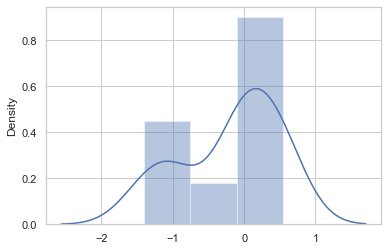

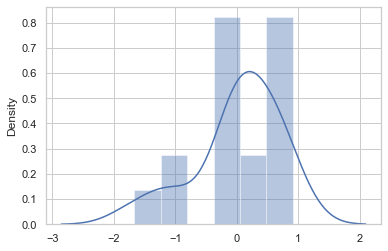

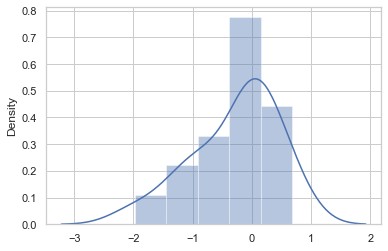

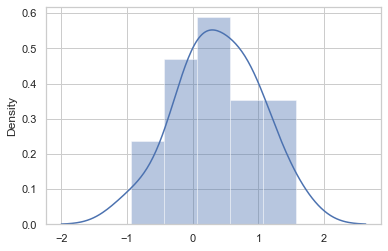

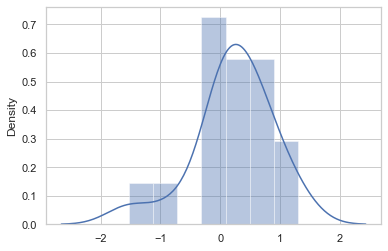

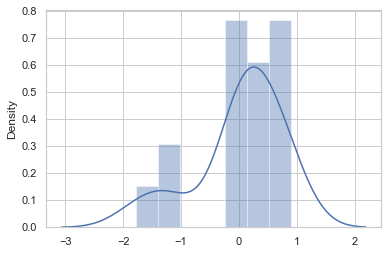

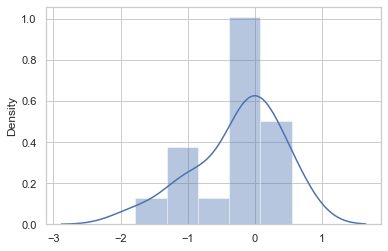

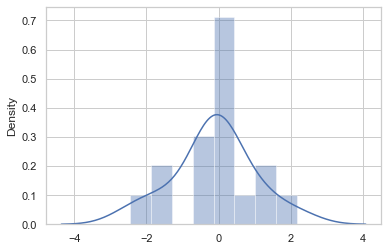

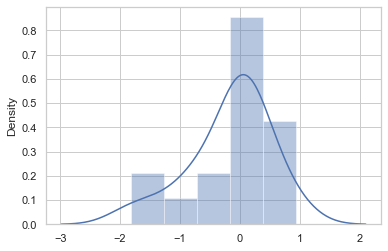

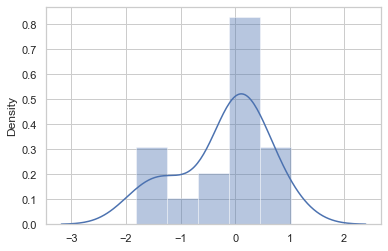

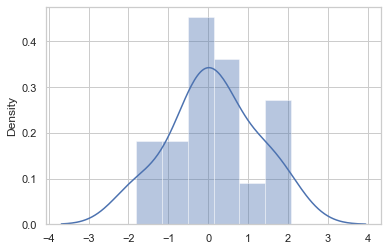

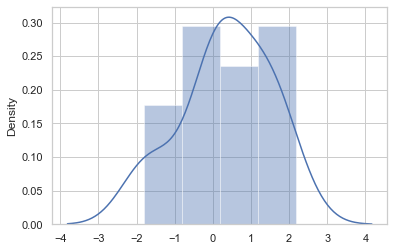

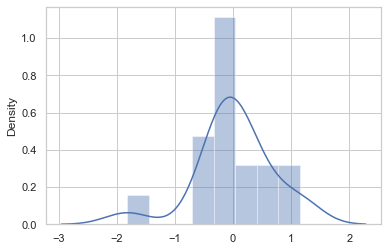

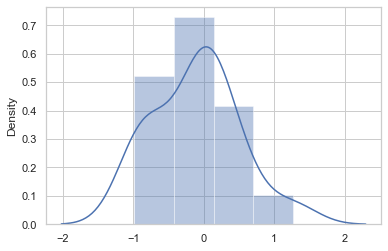

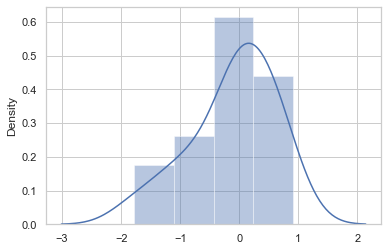

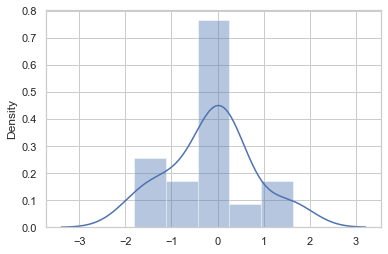

In [71]:
# visualize data after power transform
x1=scaled_f
for i in range(1,17):
    sns.distplot(x1[i])
    plt.show()

In [72]:
# now we will get the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [73]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

10

In [74]:
corr_features

{'Cloud3pm',
 'Cloud9am',
 'Humidity3pm',
 'MaxTemp',
 'Pressure3pm',
 'RainToday',
 'Temp3pm',
 'Temp9am',
 'WindSpeed3pm',
 'WindSpeed9am'}

In [75]:
# checking the correlation with target column Churn
df.corr()['Rainfall'].sort_values()

RainToday       -0.909446
RainTomorrow    -0.339334
Sunshine        -0.278252
Temp3pm         -0.235937
Evaporation     -0.171926
Pressure9am     -0.126617
Temp9am         -0.086919
Pressure3pm     -0.050590
WindSpeed3pm     0.035474
WindSpeed9am     0.050505
MinTemp          0.093093
MaxTemp          0.093093
WindGustSpeed    0.104911
Cloud3pm         0.269373
Cloud9am         0.318009
Humidity3pm      0.388798
Humidity9am      0.404503
Rainfall         1.000000
Name: Rainfall, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

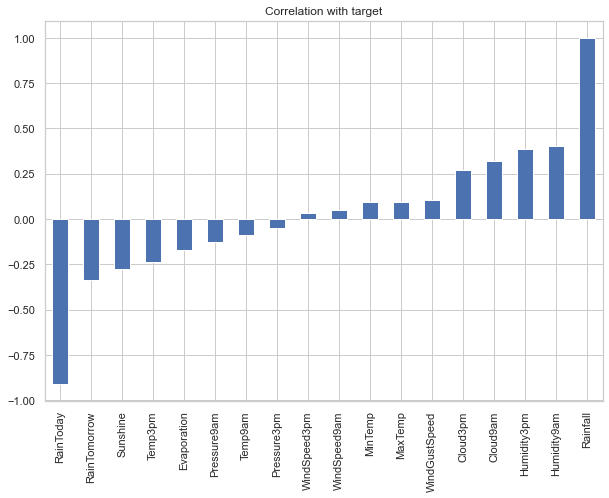

In [77]:
df.corr()['Rainfall'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')
# graphical representation of columns correaltiion with target columns


In [78]:
# dropping less correalted columns with target and putting them in X and y
X=features.drop(columns=['RainToday','RainTomorrow','Sunshine','Temp3pm','Evaporation','Pressure9am','Temp9am','Pressure3pm'],axis=1)
y=label

In [79]:
# now we will scale it again by using Standard Scaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(X)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (Scaled, i) for i in range (Scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

vif       Features
0       inf        MinTemp
1       inf        MaxTemp
2  2.003972  WindGustSpeed
3  1.848273   WindSpeed9am
4  1.823054   WindSpeed3pm
5  2.251319    Humidity9am
6  2.031059    Humidity3pm
7  1.754154       Cloud9am
8  1.713413       Cloud3pm

The VIF is less than 10 for all the columns and at good rate so we will move further.

### Applying ML

In [96]:
# importing libraries
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [82]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [83]:
# Define dataset
X, y = make_classification(n_samples=250, weights=[0.193], flip_y=0)

# Summarize class distribution
print("Original class distribution:")
print(Counter(y))

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution
print("Oversampled class distribution:")
print(Counter(y_over))

Original class distribution:
Counter({1: 201, 0: 49})
Oversampled class distribution:
Counter({1: 201, 0: 201})


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

### Logestic Regression Model

In [97]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
pred_train_lr = lr.predict(X_train)

# Evaluation metrics for Linear Regression
test_mse = mean_squared_error(y_test, pred_lr)
train_mse = mean_squared_error(y_train, pred_train_lr)
test_r2 = r2_score(y_test, pred_lr)
train_r2 = r2_score(y_train, pred_train_lr)

print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)
print("Test R^2 Score:", test_r2)
print("Train R^2 Score:", train_r2)


Test Mean Squared Error: 0.0558384620722861
Train Mean Squared Error: 0.05954136321270605
Test R^2 Score: 0.4346355715181034
Train R^2 Score: 0.658111341513117


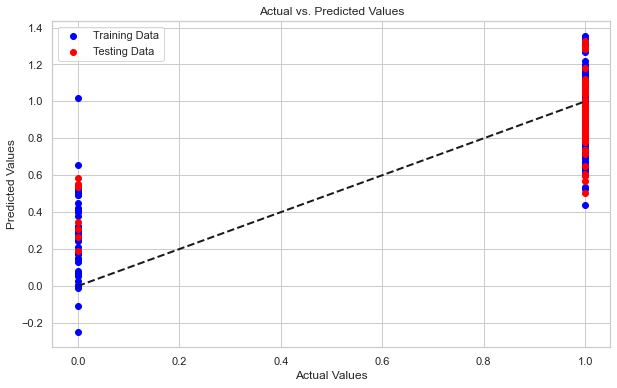

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, pred_train_lr, c='blue', label='Training Data')
plt.scatter(y_test, pred_lr, c='red', label='Testing Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### KNN Model

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
predKNN = KNN.predict(X_test)
pred_train_KNN = KNN.predict(X_train)

# Evaluation metrics for KNeighborsRegressor
test_mse = mean_squared_error(y_test, predKNN)
train_mse = mean_squared_error(y_train, pred_train_KNN)
test_r2 = r2_score(y_test, predKNN)
train_r2 = r2_score(y_train, pred_train_KNN)

print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)
print("Test R^2 Score:", test_r2)
print("Train R^2 Score:", train_r2)


Test Mean Squared Error: 0.0907936507936508
Train Mean Squared Error: 0.06802139037433157
Test R^2 Score: 0.08071428571428574
Train R^2 Score: 0.6094187192118226


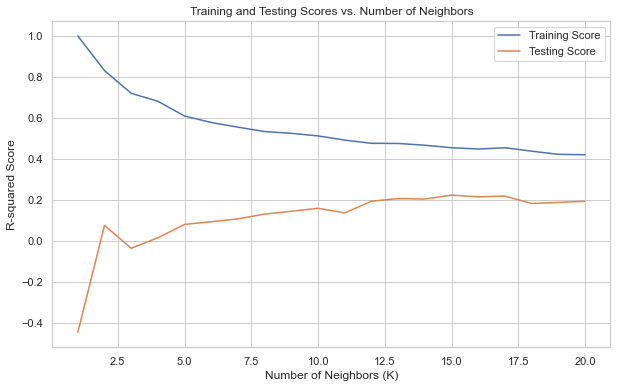

In [88]:
neighbors = np.arange(1, 21)

train_scores = []
test_scores = []

# Loop through different values of K
for k in neighbors:
    KNN = KNeighborsRegressor(n_neighbors=k)
    KNN.fit(X_train, y_train)
    
    train_score = KNN.score(X_train, y_train)  # R-squared score on training data
    test_score = KNN.score(X_test, y_test)     # R-squared score on testing data
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label='Training Score')
plt.plot(neighbors, test_scores, label='Testing Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R-squared Score')
plt.title('Training and Testing Scores vs. Number of Neighbors')
plt.legend()
plt.show()



### Decision Tree Model

In [89]:
# For Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)
pred_train_dt = dt.predict(X_train)

# Evaluation metrics for DecisionTreeRegressor
test_mse = mean_squared_error(y_test, preddt)
train_mse = mean_squared_error(y_train, pred_train_dt)
test_r2 = r2_score(y_test, preddt)
train_r2 = r2_score(y_train, pred_train_dt)

print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)
print("Test R^2 Score:", test_r2)
print("Train R^2 Score:", train_r2)

Test Mean Squared Error: 0.031746031746031744
Train Mean Squared Error: 0.0
Test R^2 Score: 0.6785714285714286
Train R^2 Score: 1.0


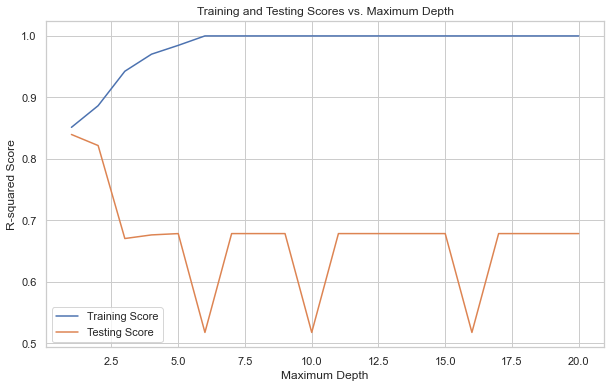

In [90]:
max_depths = np.arange(1, 21)

train_scores = []
test_scores = []

for depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)  # R-squared score on training data
    test_score = dt.score(X_test, y_test)     # R-squared score on testing data
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Score')
plt.plot(max_depths, test_scores, label='Testing Score')
plt.xlabel('Maximum Depth')
plt.ylabel('R-squared Score')
plt.title('Training and Testing Scores vs. Maximum Depth')
plt.legend()
plt.show()

### RandomForest Model

In [91]:
# For RDF model
rdf = RandomForestRegressor()
rdf.fit(X_train, y_train)
predrdf = rdf.predict(X_test)
pred_train_rdf = rdf.predict(X_train)

# Evaluation metrics for RandomForestRegressor
test_mse = mean_squared_error(y_test, predrdf)
train_mse = mean_squared_error(y_train, pred_train_rdf)
test_r2 = r2_score(y_test, predrdf)
train_r2 = r2_score(y_train, pred_train_rdf)

print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)
print("Test R^2 Score:", test_r2)
print("Train R^2 Score:", train_r2)

Test Mean Squared Error: 0.022466666666666666
Train Mean Squared Error: 0.005781818181818181
Test R^2 Score: 0.772525
Train R^2 Score: 0.966800591133005


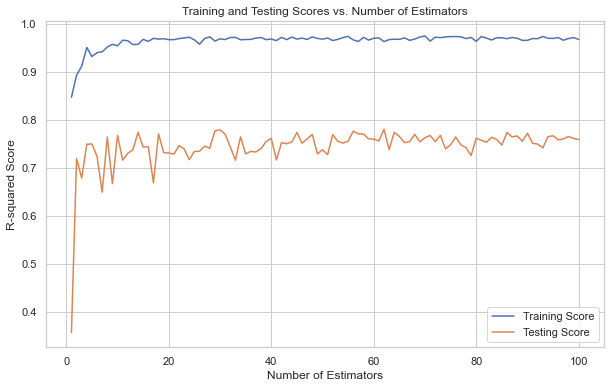

In [92]:
estimators = np.arange(1, 101)

train_scores = []
test_scores = []

for n in estimators:
    rdf = RandomForestRegressor(n_estimators=n)
    rdf.fit(X_train, y_train)
    
    train_score = rdf.score(X_train, y_train)  # R-squared score on training data
    test_score = rdf.score(X_test, y_test)     # R-squared score on testing data
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_scores, label='Training Score')
plt.plot(estimators, test_scores, label='Testing Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared Score')
plt.title('Training and Testing Scores vs. Number of Estimators')
plt.legend()
plt.show()

### SVR Model

In [93]:
# For SVR model
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
pred_train_svr = svr.predict(X_train)

# Evaluation metrics for SVR
test_mse = mean_squared_error(y_test, pred_svr)
train_mse = mean_squared_error(y_train, pred_train_svr)
test_r2 = r2_score(y_test, pred_svr)
train_r2 = r2_score(y_train, pred_train_svr)

print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)
print("Test R^2 Score:", test_r2)
print("Train R^2 Score:", train_r2)

Test Mean Squared Error: 0.07266979404657146
Train Mean Squared Error: 0.01213119041379636
Test R^2 Score: 0.26421833527846394
Train R^2 Score: 0.9303422664072176


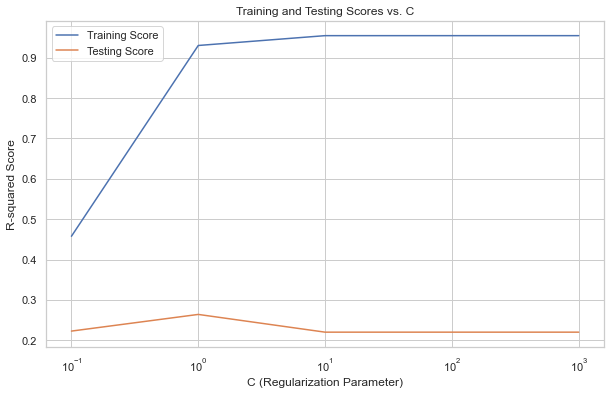

In [94]:
C_values = [0.1, 1, 10, 100, 1000]

train_scores = []
test_scores = []

for C in C_values:
    svr = SVR(C=C)
    svr.fit(X_train, y_train)
    
    train_score = svr.score(X_train, y_train)  # R-squared score on training data
    test_score = svr.score(X_test, y_test)     # R-squared score on testing data
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Score')
plt.plot(C_values, test_scores, label='Testing Score')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared Score')
plt.title('Training and Testing Scores vs. C')
plt.legend()
plt.show()


As we saw, the R2 score of the RDF model is the best among all, so we do hyperparameter tuning with the RDF model.

## Hyperparameter Tunning

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the RandomForestRegressor
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
pred_test = best_rf.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, pred_test)
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.020071121176154987


## visulaization

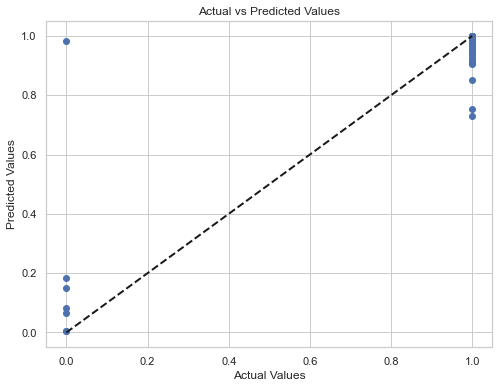

In [104]:
import matplotlib.pyplot as plt

# Train the RandomForestRegressor with best parameters
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

It implies that whenever rainfall occurs, the amount of rainfall will be greater than 1 mm. This suggests that rainfall events, regardless of location or time, will generally result in precipitation exceeding 1 mm.



### Model Saving


In [106]:
import pickle

# Train the model and obtain the best_rf model

# Save the model to a file
with open('Rainfall_weather_forecasting.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


#### Finish